# Data loading and visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
merged_df = pd.read_csv('data/cleaned/merged_df.csv')
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,...,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.018971,0.348779,0.233663,0.310232,0.058325,0.030030,0.5,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.016696,0.460808,0.317366,0.156746,0.030529,0.017855,0.3,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.171020,0.400188,0.253661,0.104736,0.070395,0.2,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.269087,0.378022,0.226947,0.060487,0.065456,0.7,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.003596,0.272173,0.367732,0.221302,0.092610,0.042588,0.6,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 66)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


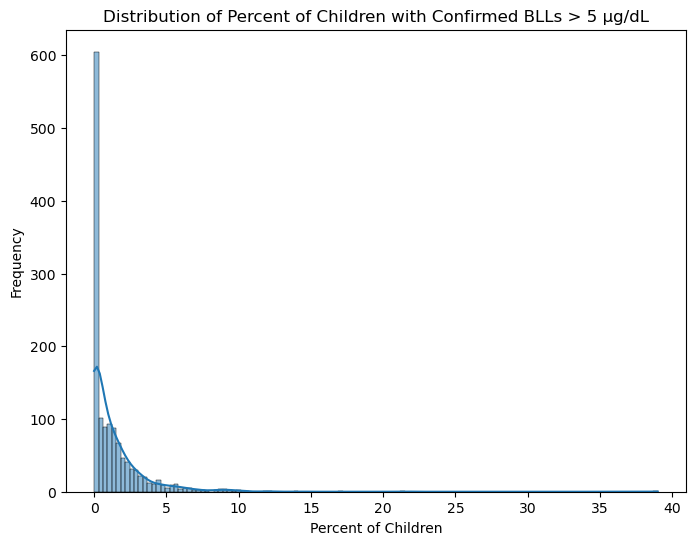

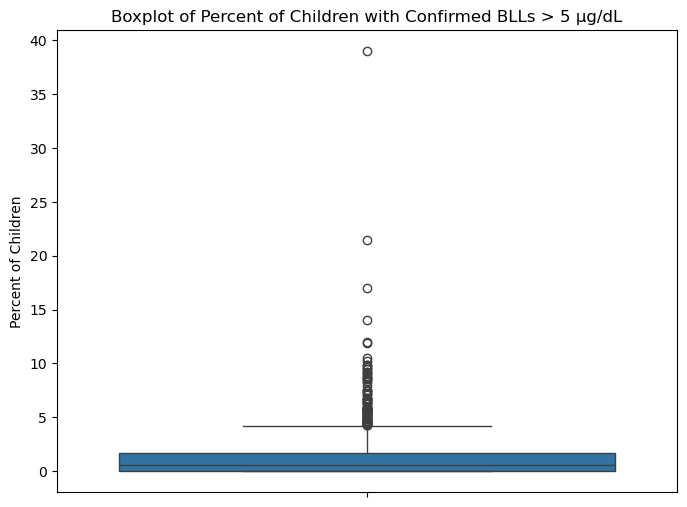

In [3]:
# Visualizations
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs > 5 µg/dL')
plt.xlabel('Percent of Children')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs > 5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

# EDA

In [4]:
# Get indices of outliers
outlier_indices = merged_df[merged_df['County']=='UNKNOWN'].index
# Remove the outlier rows, store that result in filtered_df
filtered_df = merged_df.drop(index=outlier_indices)
print(filtered_df.shape)

(2124, 66)


Built 1939 or earlier              0.447773
House Price$50,000 to $99,999      0.282895
Built 1940 to 1959                 0.218774
House Price$100,000 to $149,999    0.207115
lat                                0.205219
                                     ...   
ADHD Percentage (Current)         -0.217299
ADHD Percentage (Ever)            -0.217862
House Price$300,000 to $499,999   -0.218932
Built 2000 to 2019                -0.299559
Built 1980 to 1999                -0.337339
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, Length: 63, dtype: float64


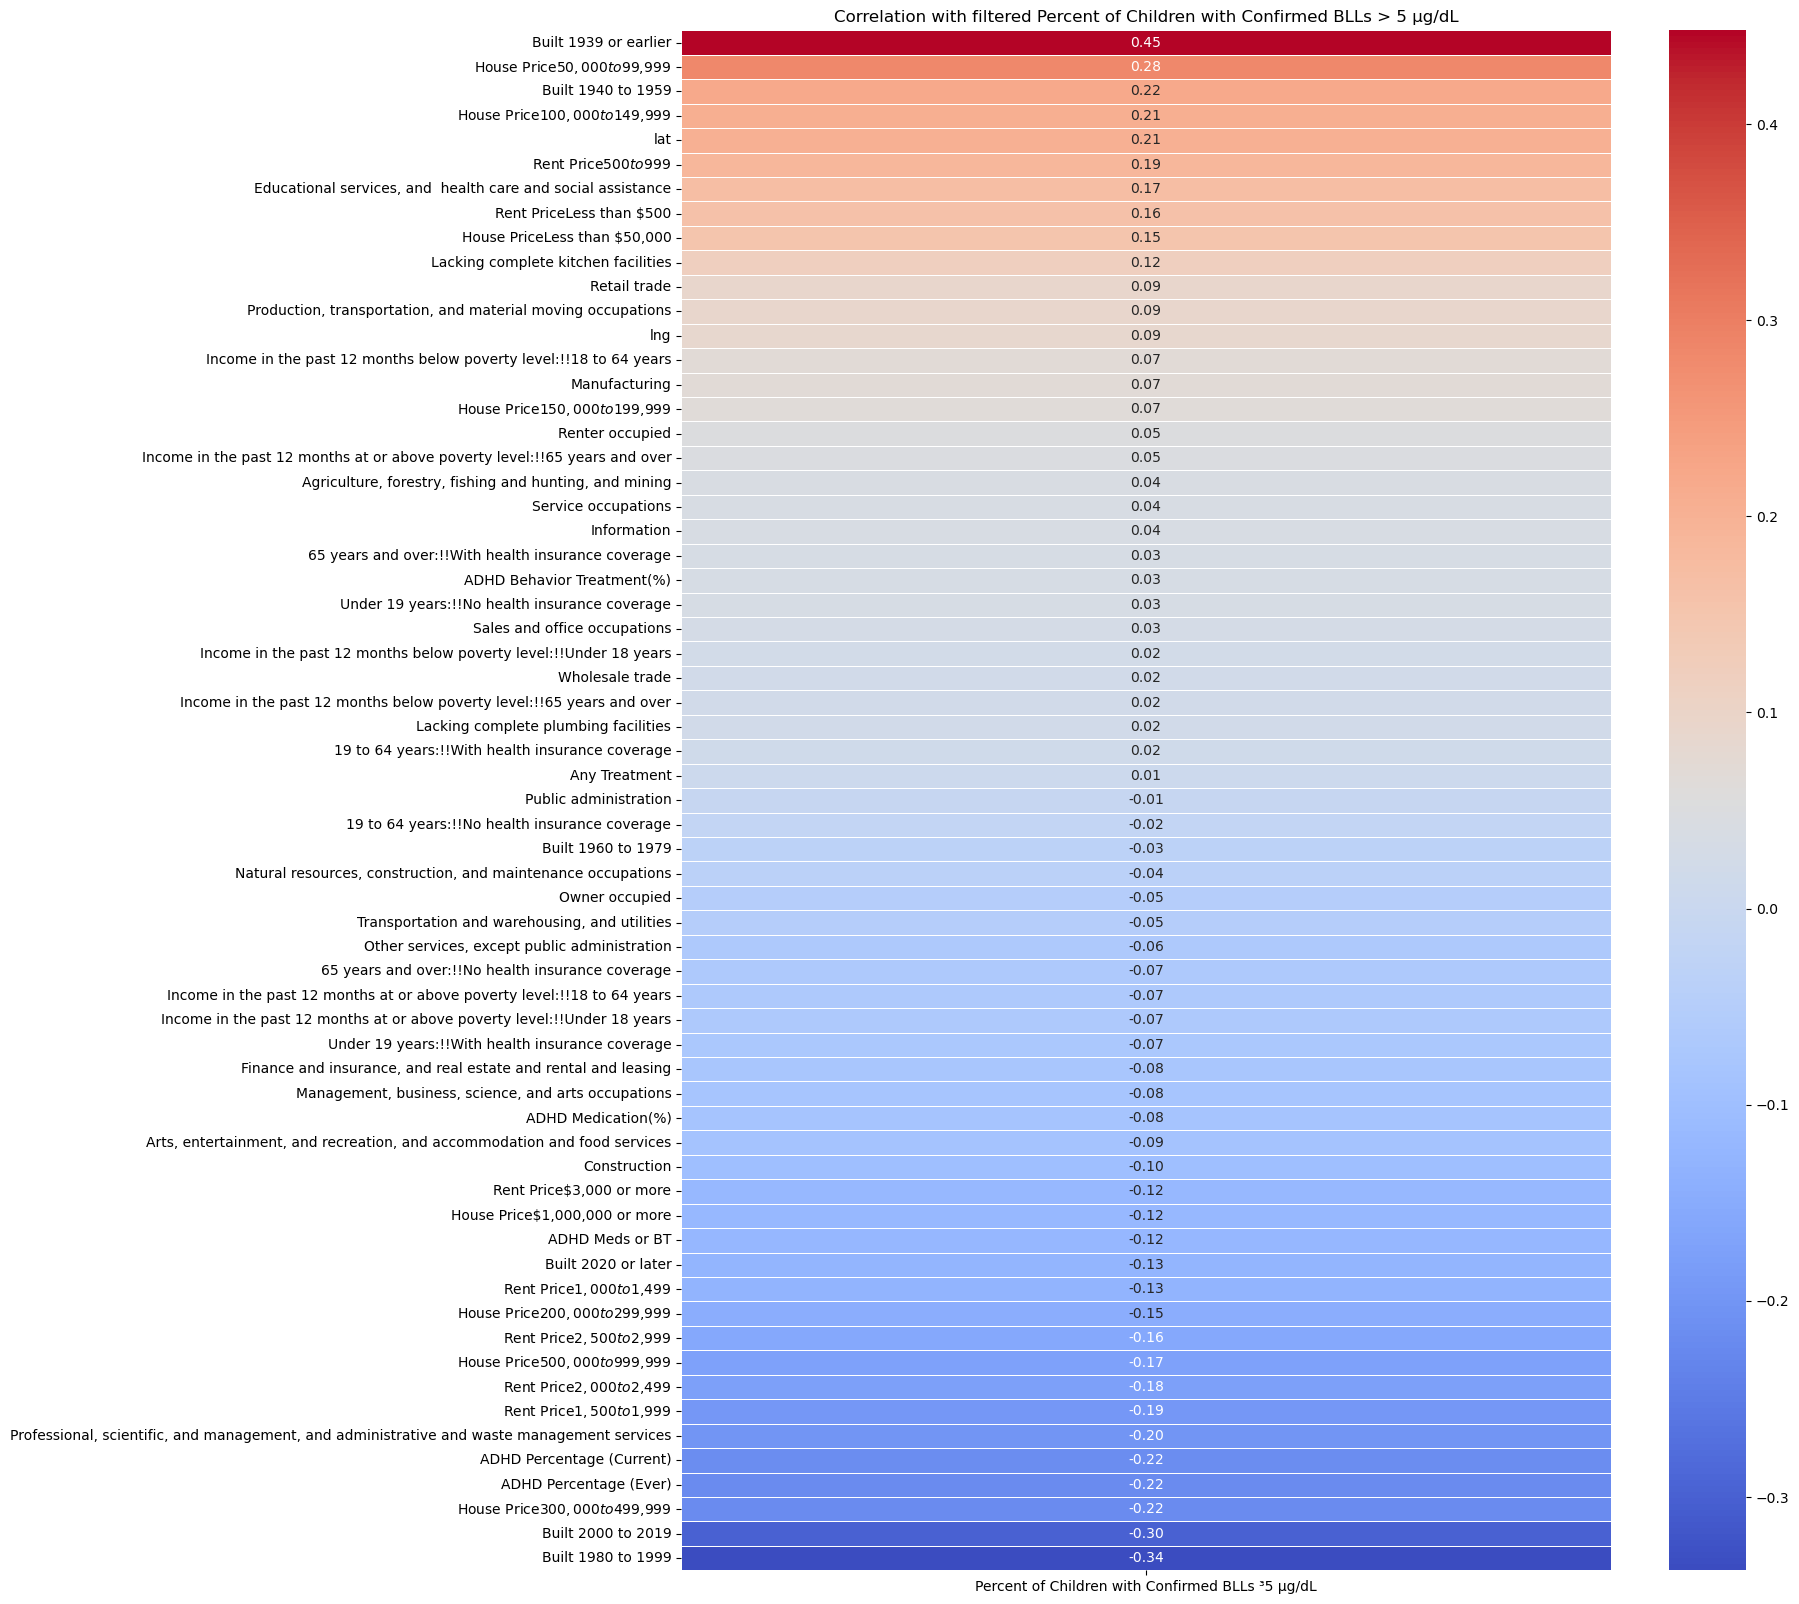

In [5]:
# Correlation analysis and visualization
# Remove relevant columns
columns_to_exclude = ['State', 'County']
correlation_filtered_df = filtered_df.drop(columns=columns_to_exclude, errors="ignore")

# Define modified data frame
correlation_with_bll = correlation_filtered_df.corr().drop('Percent of Children with Confirmed BLLs ³5 µg/dL')

# Sort the correlations in descending order
sorted_correlations = correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL'].sort_values(ascending=False)

# Print correlations
print(sorted_correlations)

# Visualize
plt.figure(figsize=(15, 20))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation with filtered Percent of Children with Confirmed BLLs > 5 µg/dL")
plt.show()

In [6]:
# Determine number of missing values in filtered_df
missing_percentage = filtered_df[bll_column].isnull().sum() / len(filtered_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 37.43%


# Data cleaning for features

In [7]:
# Identify columns with missing values, excluding specified columns
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(f"Number of feature columns with missing entries is :{len(cols_with_missing)}")
print(cols_with_missing)

Number of feature columns with missing entries is :57
['Built 2020 or later', 'Built 2000 to 2019', 'Built 1980 to 1999', 'Built 1960 to 1979', 'Built 1940 to 1959', 'Built 1939 or earlier', 'Lacking complete plumbing facilities', 'Lacking complete kitchen facilities', 'House PriceLess than $50,000', 'House Price$50,000 to $99,999', 'House Price$100,000 to $149,999', 'House Price$150,000 to $199,999', 'House Price$200,000 to $299,999', 'House Price$300,000 to $499,999', 'House Price$500,000 to $999,999', 'House Price$1,000,000 or more', 'Rent PriceLess than $500', 'Rent Price$500 to $999', 'Rent Price$1,000 to $1,499', 'Rent Price$1,500 to $1,999', 'Rent Price$2,000 to $2,499', 'Rent Price$2,500 to $2,999', 'Rent Price$3,000 or more', 'Owner occupied', 'Renter occupied', 'Under 19 years:!!With health insurance coverage', 'Under 19 years:!!No health insurance coverage', '19 to 64 years:!!With health insurance coverage', '19 to 64 years:!!No health insurance coverage', '65 years and over

# Feature engineering

In [8]:
# Set a correlation threshold to remove features
corr_threshold = 0.02

# Use the previously calculated correlation_with_bll
# Get features with low correlation
low_corr_features = correlation_with_bll[
    abs(correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL']) <= corr_threshold
].index.tolist()

# Print low_corr_features and their correlations for debugging
print("Low Correlation Features:")
for feature in low_corr_features:
    corr_value = correlation_with_bll.loc[feature, 'Percent of Children with Confirmed BLLs ³5 µg/dL']
    print(f"  {feature}: {corr_value}")

# Remove house price and rent price features and some more
cols_to_remove = list(set(low_corr_features + [ 
    'House PriceLess than $50,000',
    'House Price$50,000 to $99,999',
    'House Price$100,000 to $149,999',
    'House Price$150,000 to $199,999',
    'House Price$200,000 to $299,999',
    'House Price$300,000 to $499,999',
    'House Price$500,000 to $999,999',
    'House Price$1,000,000 or more',
    'Rent PriceLess than $500',
    'Rent Price$500 to $999',
    'Rent Price$1,000 to $1,499',
    'Rent Price$1,500 to $1,999',
    'Rent Price$2,000 to $2,499',
    'Rent Price$2,500 to $2,999',
    'Rent Price$3,000 or more',
]))

# Print cols_to_remove to verify features being dropped
print("\nColumns to Remove:")
print(cols_to_remove)
print(f"The number of feature columns we removed is: {len(cols_to_remove)}")


Low Correlation Features:
  Lacking complete plumbing facilities: 0.019586263011316718
  19 to 64 years:!!With health insurance coverage: 0.01607417277988455
  19 to 64 years:!!No health insurance coverage: -0.015399603427433316
  Public administration: -0.007885022356251303
  Income in the past 12 months below poverty level:!!65 years and over: 0.0197779648255977
  Any Treatment: 0.006804883056936159

Columns to Remove:
['Rent Price$3,000 or more', 'House Price$300,000 to $499,999', 'House PriceLess than $50,000', 'House Price$150,000 to $199,999', 'Any Treatment', 'House Price$1,000,000 or more', 'House Price$50,000 to $99,999', 'Rent Price$2,500 to $2,999', '19 to 64 years:!!No health insurance coverage', 'House Price$500,000 to $999,999', 'Lacking complete plumbing facilities', 'Rent Price$1,000 to $1,499', 'Income in the past 12 months below poverty level:!!65 years and over', 'House Price$200,000 to $299,999', 'Rent Price$500 to $999', '19 to 64 years:!!With health insurance cove

In [9]:
# Drop the columns from filtered_df
filtered_df = filtered_df.drop(columns=cols_to_remove, errors="ignore")
print(filtered_df.shape)

(2124, 45)


In [10]:
# Count non-null values in the target column
non_null_count = filtered_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].notna().sum()

# Print the count
print(f"Number of rows with non-null percent bll values: {non_null_count}")

Number of rows with non-null percent bll values: 1329


# Data splitting


In [11]:
from sklearn.model_selection import train_test_split

# Remove 'State' and 'County'
new_df = filtered_df.drop(columns=['State', 'County'])
# Split data into training and prediction sets
df_train = new_df[filtered_df[bll_column].notnull()]
df_predict = new_df[filtered_df[bll_column].isnull()]

# Features (X) and target variable (y)
X_train = df_train.drop(columns=bll_column)
y_train = df_train[bll_column]
X_predict = df_predict.drop(columns=bll_column)

# Split training sets into 80/20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_predict", X_predict.shape)

X_train shape: (1063, 42)
X_val shape: (266, 42)
y_train shape: (1063,)
y_val shape: (266,)
X_predict (795, 42)


In [12]:
print(X_train.shape)

(1063, 42)


In [13]:
# Scale ADHD columns to be over 1 instead of 100

adhd_cols = [col for col in X_train.columns if col.startswith('ADHD')]
if 'Any Treatment' not in cols_to_remove:  
    adhd_cols.append('Any Treatment')
    
for col in adhd_cols:
    X_train[col] = X_train[col] / 100 
    X_val[col] = X_val[col] / 100  
    X_predict[col] = X_predict[col] / 100  

In [14]:
# Imputation:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Identify columns with missing values in X_train (excluding target)
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Create and fit the imputer on X_train
imputer = IterativeImputer(max_iter=20, random_state=42)
imputer.fit(X_train[cols_with_missing])

# Transform X_train, X_val, and X_predict
X_train_imputed = imputer.transform(X_train[cols_with_missing])
X_val_imputed = imputer.transform(X_val[cols_with_missing])
X_predict_imputed = imputer.transform(X_predict[cols_with_missing])

# Update X_train, X_val, and X_predict with imputed values
X_train[cols_with_missing] = X_train_imputed
X_val[cols_with_missing] = X_val_imputed
X_predict[cols_with_missing] = X_predict_imputed

# Modeling with extra trees

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Define Extra Trees Regressor
extra_trees_reg = ExtraTreesRegressor(random_state=42)

# Define a Refined Hyperparameter Search Space
param_distributions = {
    'n_estimators': randint(200, 500), 
    'max_depth': randint(10, 30),  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],  
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error'],
    'ccp_alpha': uniform(0.0, 0.05)  
}

# Create RandomizedSearchCV
random_search_extra_trees = RandomizedSearchCV(
    estimator=extra_trees_reg,
    param_distributions=param_distributions,
    n_iter=100,  
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise' 
)

# Fit the model using RandomizedSearchCV with Try-Except Block
try:
    random_search_extra_trees.fit(X_train, y_train)
except ValueError as e:
    print(f"Error during fit: {e}")

# Get the best parameters and best estimator
best_params_extra_trees = random_search_extra_trees.best_params_
best_extra_trees_reg = random_search_extra_trees.best_estimator_

# Make predictions and evaluate
y_pred_extra_trees = best_extra_trees_reg.predict(X_val)
mse_extra_trees = mean_squared_error(y_val, y_pred_extra_trees)
r2_extra_trees = r2_score(y_val, y_pred_extra_trees)
rmse_extra_trees = np.sqrt(mse_extra_trees)

print("Hyperparameter Tuned Extra Trees Regression Results:")
print(f"  Best Parameters: {best_params_extra_trees}")
print(f"  Root Mean Squared Error: {rmse_extra_trees}")
print(f"  R-squared: {r2_extra_trees}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.004998745790900145, criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=457; total time=   0.7s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimato

In [16]:
# Get feature importance
feature_importance_extra_trees = best_extra_trees_reg.feature_importances_

# Create df for feature importance
feature_importance_extra_trees_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_extra_trees
})

# Sort by importance
feature_importance_extra_trees_df = feature_importance_extra_trees_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_extra_trees = feature_importance_extra_trees_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_extra_trees:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 5
Feature: ADHD Percentage (Ever), Index: 37
Feature: lng, Index: 36
Feature: ADHD Percentage (Current), Index: 38
Feature: ADHD Meds or BT, Index: 41
Feature: ADHD Behavior Treatment(%), Index: 39
Feature: lat, Index: 35
Feature: ADHD Medication(%), Index: 40
Feature: Built 2000 to 2019, Index: 1
Feature: Professional, scientific, and management, and administrative and waste management services, Index: 21


# Visualization with Extra Trees

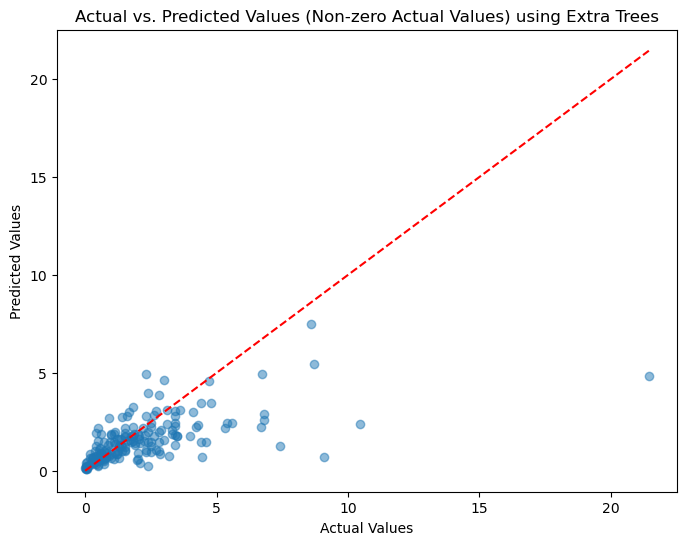

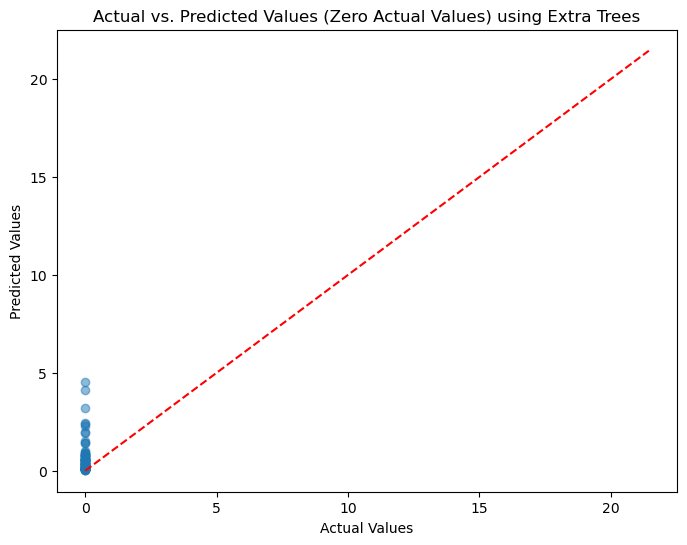

In [17]:
# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_extra_trees[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using Extra Trees")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_extra_trees[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using Extra Trees")
plt.show()

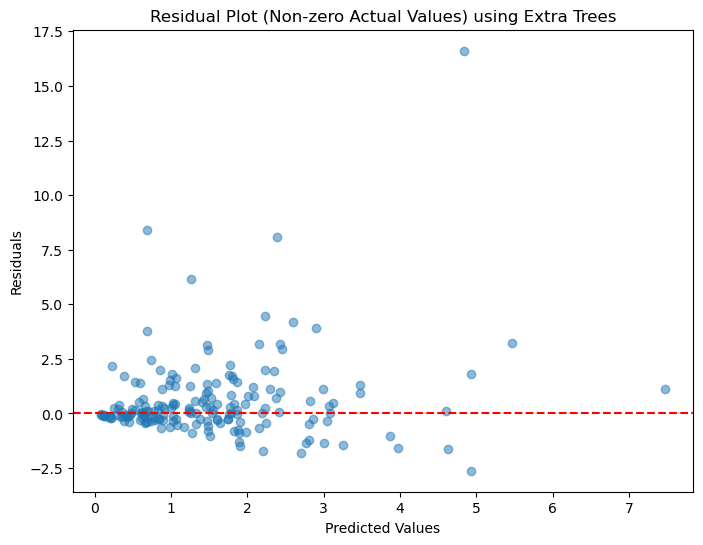

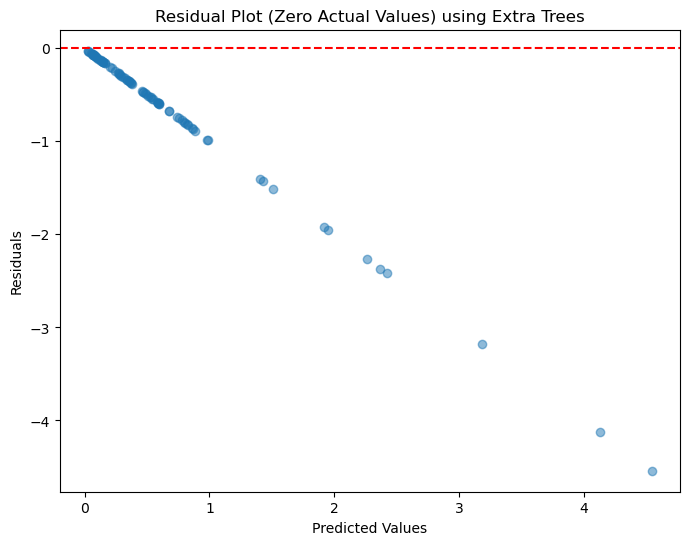

In [18]:
# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_extra_trees[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using Extra Trees")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_extra_trees[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using Extra Trees")
plt.show()

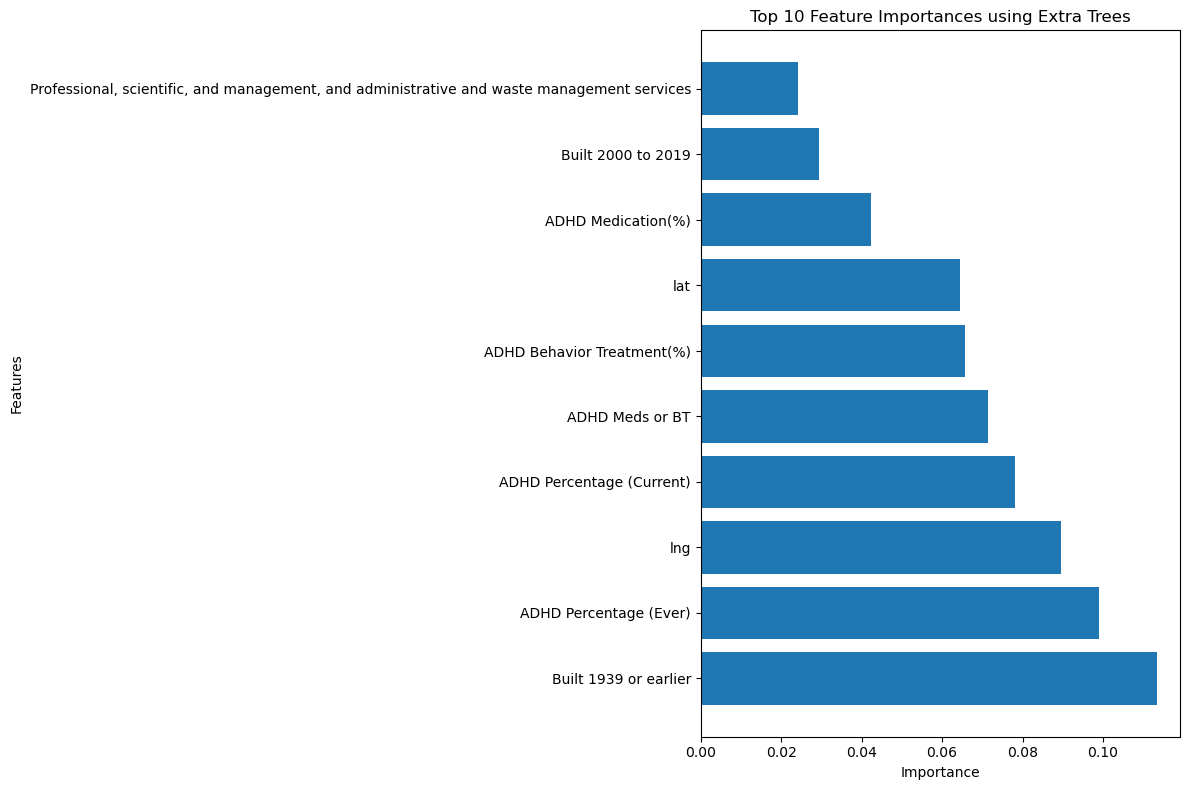

In [19]:
# Select top 10 features
top_10_features = feature_importance_extra_trees_df.head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances using Extra Trees")
plt.tight_layout()
plt.show()

# Model training with Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100,500,50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the scaled training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   3.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   3.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=25

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [21]:
# Get the best parameters
best_params_rf = random_search.best_params_
print("Best Parameters:", best_params_rf)

# Get the best model
best_model_rf = random_search.best_estimator_

# Make predictions
y_pred_rf = best_model_rf.predict(X_val)

# Evaluate MSE and R2
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Calculate RMSE
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Best Parameters: {'n_estimators': np.int64(250), 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
Random Forest - Root Mean Squared Error: 1.756220382764566
Random Forest - R-squared: 0.3543700898068419


In [22]:
# Get feature importance
feature_importance_rf = best_model_rf.feature_importances_

# Create df for feature importance
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
})

# Sort by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_rf = feature_importance_rf_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_rf:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 5
Feature: lng, Index: 36
Feature: ADHD Meds or BT, Index: 41
Feature: ADHD Behavior Treatment(%), Index: 39
Feature: lat, Index: 35
Feature: ADHD Percentage (Ever), Index: 37
Feature: Professional, scientific, and management, and administrative and waste management services, Index: 21
Feature: Agriculture, forestry, fishing and hunting, and mining, Index: 13
Feature: Construction, Index: 14
Feature: Manufacturing, Index: 15


# Model training with XGboost

In [23]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Get best params and best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_
print("Best XGBoost Parameters:", best_params_xgb)

# Make predictions on validation set
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Calculate RMSE
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost - Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=7,

In [24]:
# Get feature importance
feature_importance_xgb = best_xgb_model.feature_importances_

# Create df for feature importance
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Sort by importance
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_xgb = feature_importance_xgb_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_xgb:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 5
Feature: ADHD Percentage (Ever), Index: 37
Feature: ADHD Behavior Treatment(%), Index: 39
Feature: ADHD Meds or BT, Index: 41
Feature: lat, Index: 35
Feature: lng, Index: 36
Feature: Professional, scientific, and management, and administrative and waste management services, Index: 21
Feature: ADHD Medication(%), Index: 40
Feature: Income in the past 12 months at or above poverty level:!!65 years and over, Index: 34
Feature: 65 years and over:!!No health insurance coverage, Index: 12


# Visualizations with XGBoost

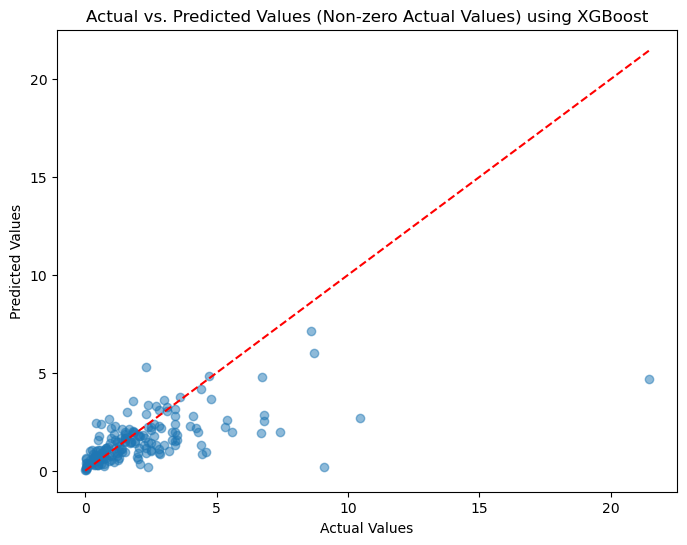

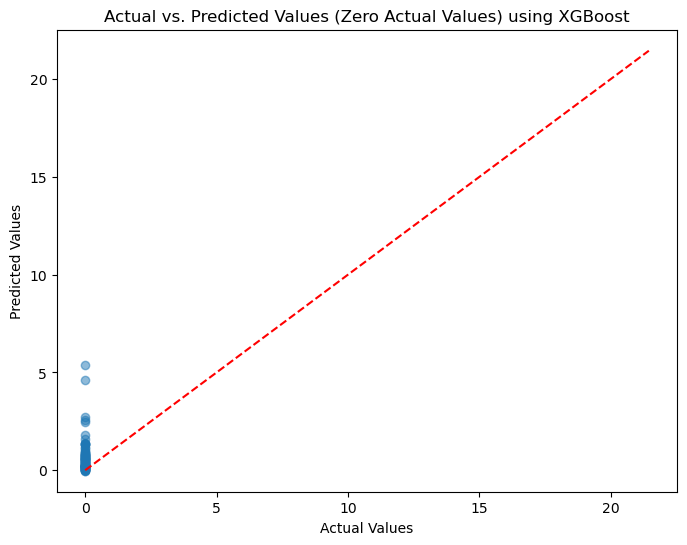

In [25]:
# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_xgb[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using XGBoost")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_xgb[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using XGBoost")
plt.show()

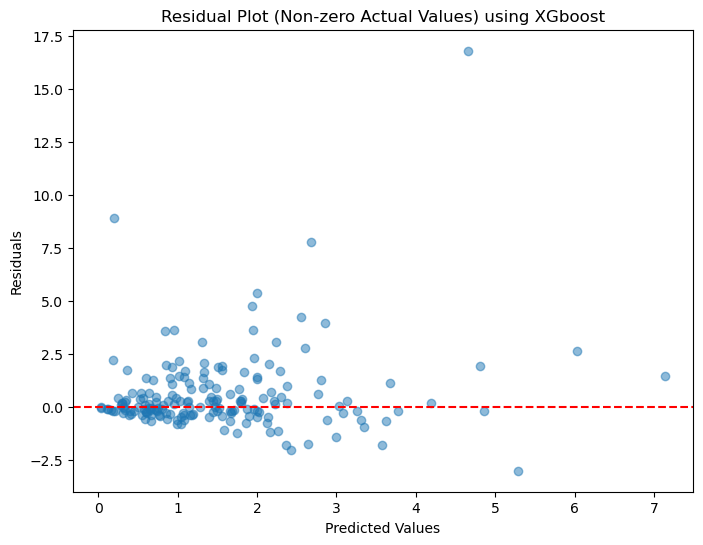

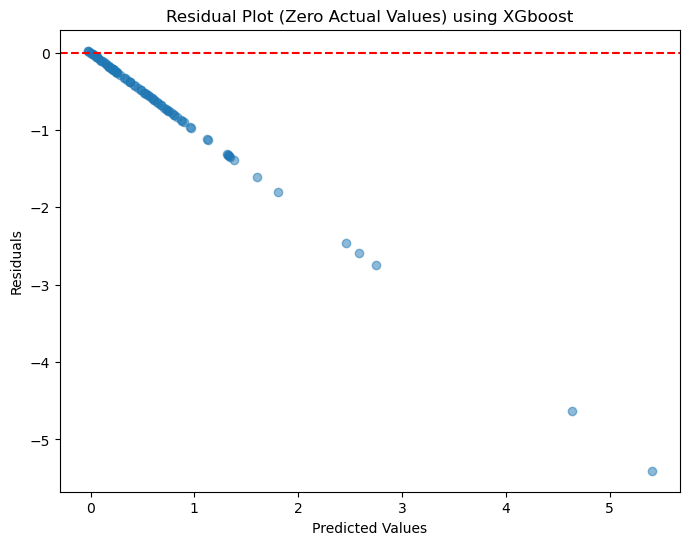

In [26]:
# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_xgb[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using XGboost")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_xgb[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using XGboost")
plt.show()

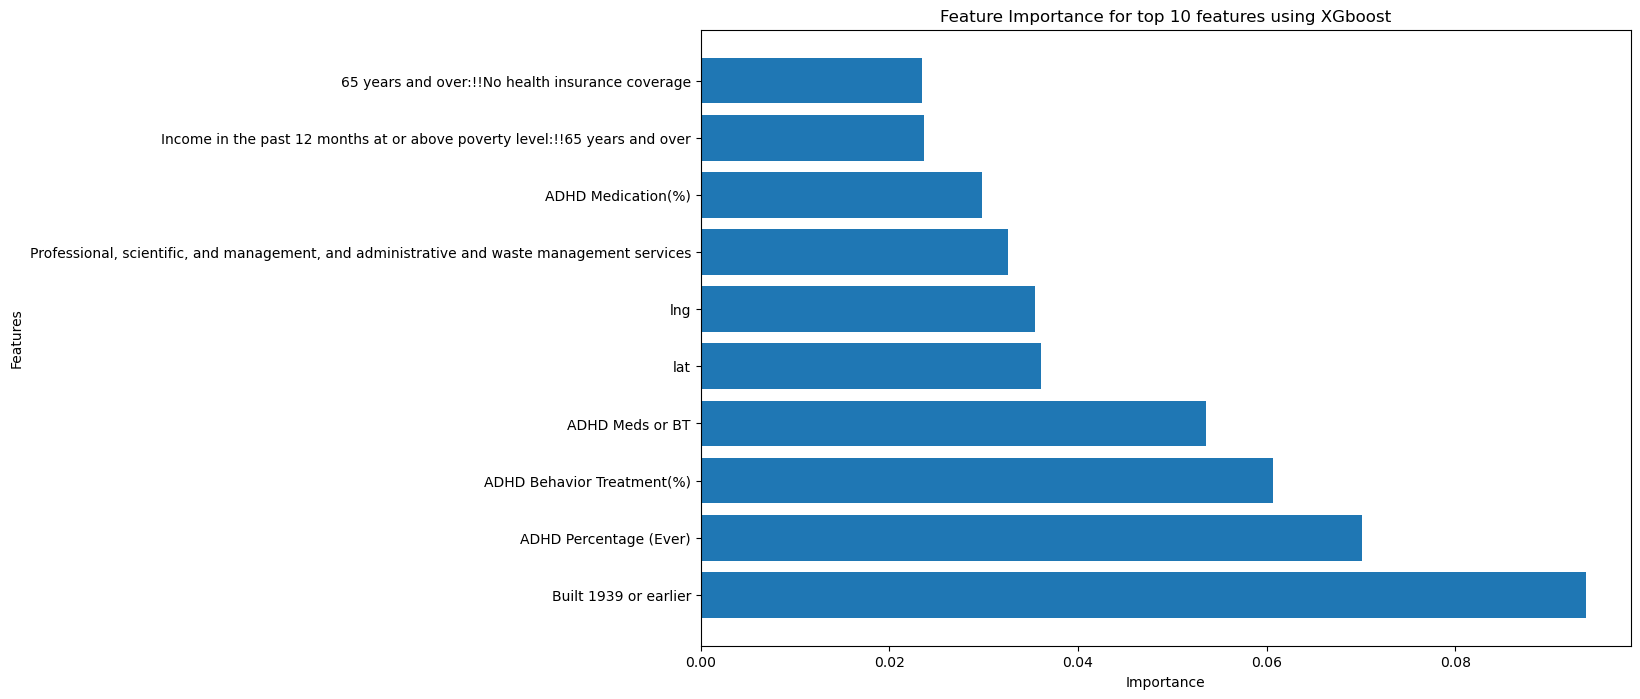

In [27]:
# Bar chart of top 10 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_xgb_df['Feature'].head(10), feature_importance_xgb_df['Importance'].head(10)) #Changed this line
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for top 10 features using XGboost")
plt.show()